### Data Wrangling Steps & Summary

The US_Accidents_Dec19 dataset is read in and the following steps carried out:<br>
1. Run .describe(), info() and shape to have an idea about the statistics of the numerical data, and the data types in the file.
2. Based on 1. some data types were changed e.g. to datetime or categorical.
3. Time information is extracted: 'day_of_week', and 'hour'.
4. Some boxplots were used to check for presence of outliers in the data.
5. Null counts on data:<br>
Weather variables with the highest null counts are 'Wind_Chill' and 'Precipitation'. 
6. Resampled data to reduce size, and saved (dec19_400k_rs1.csv).
7. Extra (was_null) columns were added to the dataframe to tag filled columns with previously missing values.<br>
8. Missing values were filled:
> - Missing Precipitation values were filled with '0' with the assumption of no rain on those days.<br>
> - Both median and mean values were tested with Temperature and Wind_Speed. No big difference was found (a slight advantage was found in using median for Wind_Speed).
> - Temperature, Pressure and Visibility were filled with the mean.
> - A formula for Wind_Chill was predicted using a linear Regression model. Details on this are found in the 'Wind_Chill Prediction tests' notebook.<br>
> - Number and Zipcode were not filled since they represent actual street numbers and zipcodes.

9. The cleaned data was saved for future use ('dec19_400k_rs1_edt.csv').
The filled features (Temperature_filled_mean, Humidity_filled_mean and Wind_Speed_filled_median, were used as input to predict the missing Wind_Chill values.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
dec19 = pd.read_csv('US_Accidents_Dec19.csv')

In [6]:
dec19.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TMC,2246264.0,207.831632,20.329586,200.000000,201.000000,201.000000,201.000000,4.060000e+02
Severity,2974335.0,2.360190,0.541473,1.000000,2.000000,2.000000,3.000000,4.000000e+00
Start_Lat,2974335.0,36.493605,4.918849,24.555269,33.550402,35.849689,40.370260,4.900220e+01
Start_Lng,2974335.0,-95.426254,17.218806,-124.623833,-117.291985,-90.250832,-80.918915,-6.711317e+01
End_Lat,728071.0,37.580871,5.004757,24.570110,33.957554,37.903670,41.372630,4.907500e+01
End_Lng,728071.0,-99.976032,18.416647,-124.497829,-118.286610,-96.631690,-82.323850,-6.710924e+01
Distance(mi),2974335.0,0.285565,1.548392,0.000000,0.000000,0.000000,0.010000,3.336300e+02
Number,1056730.0,5837.003544,15159.278074,0.000000,837.000000,2717.000000,7000.000000,9.999997e+06
Temperature(F),2918272.0,62.351203,18.788549,-77.800000,50.000000,64.400000,76.000000,1.706000e+02
Wind_Chill(F),1121712.0,51.326849,25.191271,-65.900000,32.000000,54.000000,73.000000,1.150000e+02


In [10]:
dec19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [43]:
#resample data to minimize size
#dec19_400k_rs1 = dec19.sample(n=400000, random_state=1)

In [44]:
# output file as csv
#dec19_400k_rs1.to_csv('dec19_400k_rs1.csv')

In [14]:
df = pd.read_csv('dec19_400k_rs1.csv')

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400000.0,1.490152e+06,858207.037319,12.000000,747469.000000,1.491116e+06,2.234019e+06,2.974329e+06
TMC,301701.0,2.078415e+02,20.295358,200.000000,201.000000,2.010000e+02,2.010000e+02,4.060000e+02
Severity,400000.0,2.360142e+00,0.541752,1.000000,2.000000,2.000000e+00,3.000000e+00,4.000000e+00
Start_Lat,400000.0,3.649319e+01,4.919935,24.570442,33.552807,3.584462e+01,4.036781e+01,4.900058e+01
Start_Lng,400000.0,-9.541889e+01,17.210788,-124.497523,-117.291287,-9.028814e+01,-8.091863e+01,-6.760688e+01
End_Lat,98299.0,3.759917e+01,5.002061,24.571534,33.959787,3.792923e+01,4.138087e+01,4.907500e+01
End_Lng,98299.0,-9.998674e+01,18.415574,-124.497442,-118.286333,-9.662868e+01,-8.234398e+01,-6.762660e+01
Distance(mi),400000.0,2.875614e-01,1.587642,0.000000,0.000000,0.000000e+00,1.000000e-02,3.336300e+02
Number,141503.0,5.820273e+03,11736.123756,1.000000,845.500000,2.716000e+03,6.999000e+03,9.610520e+05
Temperature(F),392443.0,6.236745e+01,18.780979,-77.800000,50.000000,6.440000e+01,7.600000e+01,1.688000e+02


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 50 columns):
Unnamed: 0               400000 non-null int64
ID                       400000 non-null object
Source                   400000 non-null object
TMC                      301701 non-null float64
Severity                 400000 non-null int64
Start_Time               400000 non-null object
End_Time                 400000 non-null object
Start_Lat                400000 non-null float64
Start_Lng                400000 non-null float64
End_Lat                  98299 non-null float64
End_Lng                  98299 non-null float64
Distance(mi)             400000 non-null float64
Description              400000 non-null object
Number                   141503 non-null float64
Street                   400000 non-null object
Side                     400000 non-null object
City                     399990 non-null object
County                   400000 non-null object
State                 

In [17]:
# Change data type
df = df.astype({"Wind_Direction":'category', "Weather_Condition":'category', 
                      "Side":'category'}) 

In [18]:
# convert Start_Time/End_Time/Weather_Timestamp columns from 'object' to 'datetime':
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 50 columns):
Unnamed: 0               400000 non-null int64
ID                       400000 non-null object
Source                   400000 non-null object
TMC                      301701 non-null float64
Severity                 400000 non-null int64
Start_Time               400000 non-null datetime64[ns]
End_Time                 400000 non-null datetime64[ns]
Start_Lat                400000 non-null float64
Start_Lng                400000 non-null float64
End_Lat                  98299 non-null float64
End_Lng                  98299 non-null float64
Distance(mi)             400000 non-null float64
Description              400000 non-null object
Number                   141503 non-null float64
Street                   400000 non-null object
Side                     400000 non-null category
City                     399990 non-null object
County                   400000 non-null object
Stat

In [19]:
# Check datetime data in the dataset
df[['Start_Time', 'End_Time', 'Weather_Timestamp']].head()

,Start_Time,End_Time,Weather_Timestamp
0,2016-09-01 20:24:12,2016-09-01 20:54:12,2016-09-01 20:51:00
1,2016-08-29 00:42:10,2016-08-29 06:42:10,2016-08-29 00:55:00
2,2016-06-24 13:27:09,2016-06-24 19:27:09,2016-06-24 13:53:00
3,2019-05-03 08:18:18,2019-05-03 08:47:59,2019-05-03 07:54:00
4,2019-04-11 23:11:04,2019-04-12 03:11:04,2019-04-11 22:56:00


In [20]:
# Extract Day of the week from Start_Time data

df['Day_of_Week'] = df['Start_Time'].dt.dayofweek
df['Day_of_Week'].value_counts()

1    73273
2    72111
4    71922
3    71167
0    68539
5    22914
6    20074
Name: Day_of_Week, dtype: int64

In [21]:
# Extract hour of the day
df['Hour_of_Day'] = df['Start_Time'].dt.hour
df['Hour_of_Day'].value_counts()
#dec19['Hour_of_Day'].plot(kind='bar')

8     37917
7     36726
17    29769
16    28664
9     23817
15    23803
6     22971
18    22432
10    21457
11    20845
14    20203
13    19153
12    18816
19    15429
5     11294
20    11001
21     7716
4      7202
22     6604
23     3570
0      3177
2      2518
3      2464
1      2452
Name: Hour_of_Day, dtype: int64

In [22]:
df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Day_of_Week', 'Hour_of_Day'],
      dtype='object')

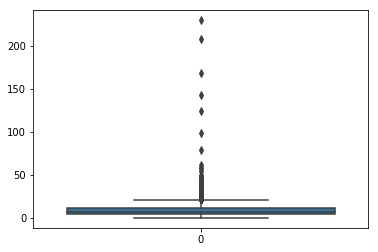

In [23]:
# Study outliers
sns.boxplot(data=df['Wind_Speed(mph)'])

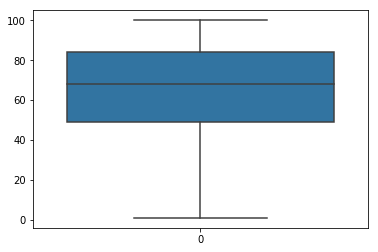

In [24]:
sns.boxplot(data=df['Humidity(%)'])

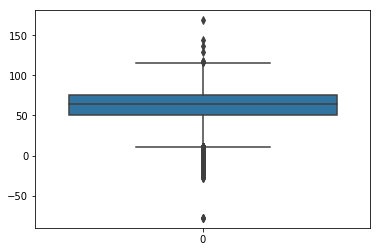

In [25]:
sns.boxplot(data=df['Temperature(F)'])

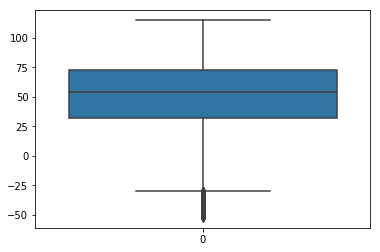

In [26]:
sns.boxplot(data=df['Wind_Chill(F)'])

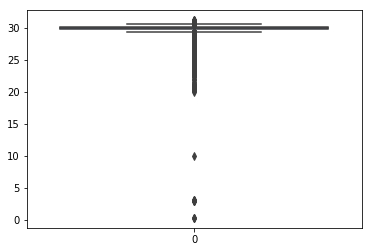

In [27]:
sns.boxplot(data=df['Pressure(in)'])

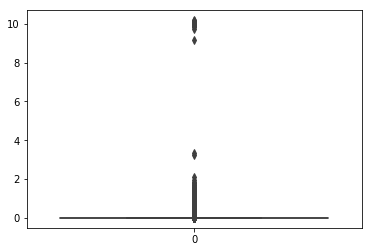

In [28]:
sns.boxplot(data=df['Precipitation(in)'])

In [29]:
# Count number of nulls in dataset
n = pd.DataFrame(df.isnull().sum())
n.columns=['Number of Missing Values']
n

,Number of Missing Values
Unnamed: 0,0
ID,0
Source,0
TMC,98299
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,301701


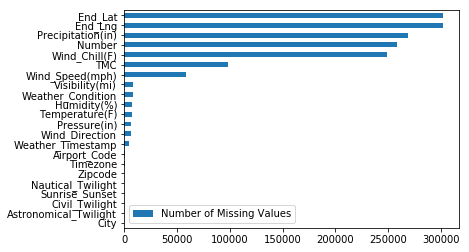

In [30]:
# Visualize number of non-zero missing data
d = n[n['Number of Missing Values'] > 0]
d.sort_values('Number of Missing Values').plot(kind='barh')


In [31]:
# Add extra column with null values for the weather variables:
df['Precipitation_wasnull'] = df['Precipitation(in)'].isnull()

In [32]:
df['Wind_Chill_wasnull'] = df['Wind_Chill(F)'].isnull()

In [33]:
df['Wind_Speed_wasnull'] = df['Wind_Speed(mph)'].isnull()

In [34]:
df['Visibility_wasnull'] = df['Visibility(mi)'].isnull()

In [35]:
df['Humidity_wasnull'] = df['Humidity(%)'].isnull()

In [36]:
df['Temperature_wasnull'] = df['Temperature(F)'].isnull()

In [37]:
df['Pressure_wasnull'] = df['Pressure(in)'].isnull()

In [38]:
df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Astronomical_Twilight,Day_of_Week,Hour_of_Day,Precipitation_wasnull,Wind_Chill_wasnull,Wind_Speed_wasnull,Visibility_wasnull,Humidity_wasnull,Temperature_wasnull,Pressure_wasnull
0,298435,A-298438,MapQuest,201.0,2,2016-09-01 20:24:12,2016-09-01 20:54:12,30.295200,-97.736923,NaN,...,Day,3,20,True,True,False,False,False,False,False
1,2327373,A-2327397,Bing,NaN,3,2016-08-29 00:42:10,2016-08-29 06:42:10,29.977700,-90.061000,29.99615,...,Night,0,0,False,False,False,False,False,False,False
2,2333228,A-2333252,Bing,NaN,2,2016-06-24 13:27:09,2016-06-24 19:27:09,41.846930,-87.948100,41.84693,...,Day,4,13,True,True,False,False,False,False,False
3,973611,A-973622,MapQuest,201.0,2,2019-05-03 08:18:18,2019-05-03 08:47:59,40.111660,-75.129280,NaN,...,Day,4,8,False,False,False,False,False,False,False
4,2905068,A-2905092,Bing,NaN,2,2019-04-11 23:11:04,2019-04-12 03:11:04,44.377351,-123.786987,44.37729,...,Night,3,23,False,False,False,False,False,False,False


In [39]:
# Fill missing values for Precipitation with 0:
df['Precipitation_filled'] = df['Precipitation(in)'].fillna(value = 0)

In [40]:
df[['Precipitation_filled', 'Precipitation(in)','Precipitation_wasnull']].head()


,Precipitation_filled,Precipitation(in),Precipitation_wasnull
0,0.0,NaN,True
1,0.0,0.0,False
2,0.0,NaN,True
3,0.0,0.0,False
4,0.0,0.0,False


In [41]:
df['Wind_Speed(mph)'].isnull().sum()

58997

In [42]:
# Fill missing values for Wind_Speed with mean:

WS_mean = df['Wind_Speed(mph)'].mean()
df['Wind_Speed_filled_mean'] = df['Wind_Speed(mph)'].fillna(WS_mean)

In [43]:
df['Wind_Speed_filled_mean'].isnull().sum()

0

In [44]:
# Fill missing values for Wind_Speed with median:

WS_median = df['Wind_Speed(mph)'].median()
df['Wind_Speed_filled_median'] = df['Wind_Speed(mph)'].fillna(WS_median)

In [45]:
df['Wind_Speed_filled_median'].isnull().sum()

0

In [46]:
df[['Wind_Speed(mph)','Wind_Speed_filled_mean', 'Wind_Speed_filled_median']].tail(4)

,Wind_Speed(mph),Wind_Speed_filled_mean,Wind_Speed_filled_median
399996,0.0,0.0,0.0
399997,6.0,6.0,6.0
399998,0.0,0.0,0.0
399999,3.0,3.0,3.0


In [47]:
# Compare median and mean fill to actual Wind_Speed(mph):
# median has stats that are marginally closer to actual Wind_Speed(mph)
#recommended for use in fillna()

print(df['Wind_Speed(mph)'].describe(), df['Wind_Speed_filled_mean'].describe(), 
df['Wind_Speed_filled_median'].describe())

count    341003.000000
mean          8.305884
std           4.874132
min           0.000000
25%           4.600000
50%           7.000000
75%          11.500000
max         230.000000
Name: Wind_Speed(mph), dtype: float64 count    400000.000000
mean          8.305884
std           4.500350
min           0.000000
25%           5.800000
50%           8.100000
75%          10.400000
max         230.000000
Name: Wind_Speed_filled_mean, dtype: float64 count    400000.000000
mean          8.113276
std           4.524111
min           0.000000
25%           5.800000
50%           7.000000
75%          10.400000
max         230.000000
Name: Wind_Speed_filled_median, dtype: float64


In [48]:
df.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Precipitation_wasnull,Wind_Chill_wasnull,Wind_Speed_wasnull,Visibility_wasnull,Humidity_wasnull,Temperature_wasnull,Pressure_wasnull,Precipitation_filled,Wind_Speed_filled_mean,Wind_Speed_filled_median
0,298435,A-298438,MapQuest,201.0,2,2016-09-01 20:24:12,2016-09-01 20:54:12,30.295200,-97.736923,NaN,...,True,True,False,False,False,False,False,0.0,6.9,6.9
1,2327373,A-2327397,Bing,NaN,3,2016-08-29 00:42:10,2016-08-29 06:42:10,29.977700,-90.061000,29.99615,...,False,False,False,False,False,False,False,0.0,0.0,0.0
2,2333228,A-2333252,Bing,NaN,2,2016-06-24 13:27:09,2016-06-24 19:27:09,41.846930,-87.948100,41.84693,...,True,True,False,False,False,False,False,0.0,10.4,10.4
3,973611,A-973622,MapQuest,201.0,2,2019-05-03 08:18:18,2019-05-03 08:47:59,40.111660,-75.129280,NaN,...,False,False,False,False,False,False,False,0.0,9.0,9.0
4,2905068,A-2905092,Bing,NaN,2,2019-04-11 23:11:04,2019-04-12 03:11:04,44.377351,-123.786987,44.37729,...,False,False,False,False,False,False,False,0.0,3.0,3.0


In [53]:
# Fill missing values for Humidity with mean:

H_mean = df['Humidity(%)'].mean()
df['Humidity_filled_mean'] = df['Humidity(%)'].fillna(H_mean)

In [54]:
print(df['Humidity(%)'].describe(), df['Humidity_filled_mean'].describe())

count    392044.000000
mean         65.398506
std          22.577303
min           1.000000
25%          49.000000
50%          68.000000
75%          84.000000
max         100.000000
Name: Humidity(%), dtype: float64 count    400000.000000
mean         65.398506
std          22.351643
min           1.000000
25%          49.000000
50%          67.000000
75%          84.000000
max         100.000000
Name: Humidity_filled_mean, dtype: float64


In [55]:
# Fill missing values for Wind_Speed with mean:

T_mean = df['Temperature(F)'].mean()
df['Temperature_filled_mean'] = df['Temperature(F)'].fillna(T_mean)

In [56]:
# Fill missing values for Temperature with median:

T_median = df['Temperature(F)'].median()
df['Temperature_filled_median'] = df['Temperature(F)'].fillna(T_median)

In [57]:
print(df['Temperature(F)'].describe(), df['Temperature_filled_mean'].describe(), 
df['Temperature_filled_median'].describe())

count    392443.000000
mean         62.367451
std          18.780979
min         -77.800000
25%          50.000000
50%          64.400000
75%          76.000000
max         168.800000
Name: Temperature(F), dtype: float64 count    400000.000000
mean         62.367451
std          18.602723
min         -77.800000
25%          51.000000
50%          64.000000
75%          75.900000
max         168.800000
Name: Temperature_filled_mean, dtype: float64 count    400000.000000
mean         62.405851
std          18.604781
min         -77.800000
25%          51.000000
50%          64.400000
75%          75.900000
max         168.800000
Name: Temperature_filled_median, dtype: float64


In [58]:
df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Day_of_Week', 'Hour_of_Day',
       'Precipitation_wasnull', 'Wind_Chill_wasnull', 'Wind_Speed_wasnull',
       'Visibility_wasnull', 'Humidity_wasnull', 'Temperature_wasnull',
       'Pressure_wasnull', 'Precipitation_filled', 'Wind_

In [62]:
# Fill missing values for Visibility with mean:

Vis_mean = df['Visibility(mi)'].mean()
df['Visibility_filled_mean'] = df['Visibility(mi)'].fillna(Vis_mean)

In [63]:
print(df['Visibility(mi)'].describe(), df['Visibility_filled_mean'].describe())

count    391156.000000
mean          9.155309
std           2.904976
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         111.000000
Name: Visibility(mi), dtype: float64 count    400000.000000
mean          9.155309
std           2.872682
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         111.000000
Name: Visibility_filled_mean, dtype: float64


In [64]:
# Fill missing values for Pressure with mean:

Pressure_mean = df['Pressure(in)'].mean()
df['Pressure_filled_mean'] = df['Pressure(in)'].fillna(Pressure_mean)

In [65]:
print(df['Pressure(in)'].describe(), df['Pressure_filled_mean'].describe())

count    393526.000000
mean         29.829979
std           0.733241
min           0.300000
25%          29.820000
50%          29.980000
75%          30.110000
max          31.150000
Name: Pressure(in), dtype: float64 count    400000.000000
mean         29.829979
std           0.727283
min           0.300000
25%          29.820000
50%          29.970000
75%          30.110000
max          31.150000
Name: Pressure_filled_mean, dtype: float64


In [59]:
# output file as csv
df.to_csv('dec19_400k_rs1_edt.csv')

In [76]:
#Check no nulls in *filled columns
pd.options.display.max_rows = 999
final_nulls

Unnamed: 0                        0
ID                                0
Source                            0
TMC                           98299
Severity                          0
Start_Time                        0
End_Time                          0
Start_Lat                         0
Start_Lng                         0
End_Lat                      301701
End_Lng                      301701
Distance(mi)                      0
Description                       0
Number                       258497
Street                            0
Side                              0
City                             10
County                            0
State                             0
Zipcode                         130
Country                           0
Timezone                        448
Airport_Code                    787
Weather_Timestamp              5017
Temperature(F)                 7557
Wind_Chill(F)                248928
Humidity(%)                    7956
Pressure(in)                